# Extending OLPS Standard Dataset
To avoid dataset selection and/or data-snooping biases, we created four new historical datasets from the four
different markets (i.e., NYSE, DJIA, SP500, and TSX). The stock selection is made based on 2 important criteria:

1) The selected stock must be listed in the index from the beginning of 2000 (since this is our starting point of test runs)

2) Each selected stock must belong to one of the largest companies by market capitalization with high liquidity.

In [1]:
# CREATES THE STOCK DATA CSV

import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data import read_stock_history, normalize, write_to_h5py
import h5py

print("Imports Complete!")

Imports Complete!


Dataset inspired by https://www.slickcharts.com/sp500

In [2]:
# Apple : AAPL
# Microsoft symbol: MSFT
# Johnson & Johnson: JNJ
# JPMorgan: JPM
# Procter & Gamble: PG
# UnitedHealth Group: UNH
# Home Depot: HD
# Walt Disney: DIS
# Verizon Communications: VZ
# Comcast: CMCSA
# Adobe: ADBE
# Pfizer: PFE
# Bank of America: BAC
# Intel: INTC
# AT&T: T
# Walmart: WMT
# Merck & Co: MRK
# Coca-Cola: KO
# Pepsi: PEP
# Abbot Labs: ABT
# Thermo: TMO
# CISCO: CSCO
# Chevron: CVX
# NIKE: NKE
# Exxon: XOM

#Dataset_Name = 'SP500'

#Assets = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'UNH', 'HD', 'DIS', 'VZ', 'CMCSA', 'ADBE', 'PFE',
#         'BAC', 'INTC', 'T', 'WMT', 'MRK', 'KO', 'PEP', 'ABT', 'TMO', 'CSCO', 'CVX', 'NKE', 'XOM']

# Dates
#date_start = "1995-01-01"
#date_end = "2020-10-01"

In [3]:
#Dataset_Name = 'DJIA'

# https://www.cnbc.com/dow-30/

# GS, CRM, V, DOW
#Assets = ['['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'UNH', 'HD', 'DIS', 'VZ', 'CMCSA', 'ADBE', 'PFE',
#         'BAC', 'INTC', 'T', 'WMT', 'MRK', 'KO', 'PEP', 'ABT', 'TMO', 'CSCO', 'CVX', 'NKE', 'XOM']']

# Dates
#date_start = "1995-01-01"
#date_end = "2020-10-01"

In [4]:
#Dataset_Name = 'NYSE'

#Assets = ['JPM', 'JNJ', 'WMT', 'BAC', 'PG', 'XOM', 'T', 'UNH', 'DIS',
#         'VZ', 'HD', 'RDS-B', 'KO', 'MRK', 'CVX', 'WFC', 'PFE', 'TM', 'BA',
#         'ORCL', 'NKE', 'MCD', 'MDT', 'ABT', 'BMY', 'UL', 'TOT', 'BHP', 'NVO',
#         'AZN', 'TMO', 'RTX', 'BP', 'HON', 'LLY', 'UNP']

# Dates
#date_start = "1995-01-01"
#date_end = "2020-10-01"

In [5]:
Dataset_Name = 'Hegde'

# https://www.semanticscholar.org/paper/Risk-aware-portfolio-construction-using-deep-policy-Hegde-Kumar/73b89a16f572d9c7d7bc1d04f8a4bb8d46125885

Assets = ['CSX', 'DISH', 'EA', 'EBAY', 'HAS', 'ILMN', 'MAR', 'REGN', 'SBUX', 'FISV', 
          'ESRX', 'DLTR', 'CTSH', 'CSCO', 'BKNG', 'AMGN', 'WDC', 'NVDA', 'MSFT']

# PCLN changed name to BKNG
# FOX: data missing in yahoo finance

# Dates
date_start = "2001-12-31"
date_end = "2016-12-31"

In [6]:
# Declare dictionary
d = {}

yf.pdr_override()

for a in Assets:
    d[a] = pdr.get_data_yahoo(a, start=date_start, end=date_end)

print("Number of Assets: {}".format(len(d)))
print("Number of Steps: {}".format(len(d[Assets[0]])))

d['EA'].head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-12-31,30.945000,30.945000,29.895,29.975000,29.898041,3140400
2002-01-02,30.245001,30.370001,29.805,30.059999,29.982822,5836200
2002-01-03,30.094999,30.809999,29.930,30.490000,30.411718,3497400
2002-01-04,31.030001,31.850000,30.705,31.480000,31.399176,4256400
2002-01-07,30.615000,31.065001,29.680,29.705000,29.628733,8307400


In [7]:
# FOX data

fox_df = pd.read_csv("datasets/MacroTrends_Data_Download_FOX.csv") 
fox_df['date'] = pd.to_datetime(fox_df['date'], format='%Y-%m-%d', errors='ignore')
fox_df = fox_df.set_index('date')
fox_df = fox_df.loc[(fox_df.index >= date_start) & (fox_df.index <= date_end)]
fox_df['Adj Close'] = fox_df['close']
fox_df['Close'] = fox_df['close']

fox_df.head()

Assets.append('FOX')

# Include in dictionary
d['FOX'] = fox_df

In [8]:
fox_df.head()

,open,high,low,close,volume,Adj Close,Close
date,,,,,,,
2001-12-31,12.4129,12.4323,12.2774,12.3200,589000,12.3200,12.3200
2002-01-02,12.2580,12.3006,11.9598,12.1960,2134200,12.1960,12.1960
2002-01-03,12.1031,12.1999,12.0450,12.1612,2252000,12.1612,12.1612
2002-01-04,12.2774,12.4323,12.2696,12.4052,1523400,12.4052,12.4052
2002-01-07,12.4052,12.5640,12.4052,12.5523,1123300,12.5523,12.5523


In [9]:
# Check if all start at desired date
for a in Assets:
    print("{}: {}".format(a,d[a].index[0]))

CSX: 2001-12-31 00:00:00
DISH: 2001-12-31 00:00:00
EA: 2001-12-31 00:00:00
EBAY: 2001-12-31 00:00:00
HAS: 2001-12-31 00:00:00
ILMN: 2001-12-31 00:00:00
MAR: 2001-12-31 00:00:00
REGN: 2001-12-31 00:00:00
SBUX: 2001-12-31 00:00:00
FISV: 2001-12-31 00:00:00
ESRX: 2001-12-31 00:00:00
DLTR: 2001-12-31 00:00:00
CTSH: 2001-12-31 00:00:00
CSCO: 2001-12-31 00:00:00
BKNG: 2001-12-31 00:00:00
AMGN: 2001-12-31 00:00:00
WDC: 2001-12-31 00:00:00
NVDA: 2001-12-31 00:00:00
MSFT: 2001-12-31 00:00:00
FOX: 2001-12-31 00:00:00


In [10]:
for a in Assets:
    # Interpolate
    d[a] = d[a].interpolate(method='polynomial', order=2)
    # Daily Returns 
    d[a]['Daily Return'] = d[a]["Adj Close"].pct_change(1) # 1 for ONE DAY lookback
    # Log Return
    d[a]['Log Return'] = np.log(d[a]["Adj Close"]/d[a]["Adj Close"].shift(1))
    # Add Code
    d[a]['Code'] = a
    
d[Assets[0]].head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Log Return,Code
Date,,,,,,,,,
2001-12-31,5.811667,5.900000,5.806667,5.841667,4.211683,4245000,NaN,NaN,CSX
2002-01-02,5.921667,6.000000,5.875000,5.923333,4.270564,7628400,0.013980,0.013884,CSX
2002-01-03,5.890000,6.241667,5.890000,6.241667,4.500074,12991200,0.053742,0.052348,CSX
2002-01-04,6.250000,6.513333,6.250000,6.416667,4.626245,14011800,0.028037,0.027652,CSX
2002-01-07,6.383333,6.518333,6.366667,6.456667,4.655084,9519600,0.006234,0.006214,CSX


In [11]:
# Check if all start correctly
for a in Assets:
    print(a, ": ", d[a].index[0], ", ", d[a]['Close'].iloc[0])

CSX :  2001-12-31 00:00:00 ,  5.841667175292969
DISH :  2001-12-31 00:00:00 ,  27.469999313354492
EA :  2001-12-31 00:00:00 ,  29.975000381469727
EBAY :  2001-12-31 00:00:00 ,  7.0391411781311035
HAS :  2001-12-31 00:00:00 ,  16.229999542236328
ILMN :  2001-12-31 00:00:00 ,  5.880000114440918
MAR :  2001-12-31 00:00:00 ,  18.947277069091797
REGN :  2001-12-31 00:00:00 ,  28.15999984741211
SBUX :  2001-12-31 00:00:00 ,  4.762499809265137
FISV :  2001-12-31 00:00:00 ,  10.579999923706055
ESRX :  2001-12-31 00:00:00 ,  5.84499979019165
DLTR :  2001-12-31 00:00:00 ,  10.303333282470703
CTSH :  2001-12-31 00:00:00 ,  1.7074999809265137
CSCO :  2001-12-31 00:00:00 ,  18.110000610351562
BKNG :  2001-12-31 00:00:00 ,  34.91999816894531
AMGN :  2001-12-31 00:00:00 ,  56.439998626708984
WDC :  2001-12-31 00:00:00 ,  6.269999980926514
NVDA :  2001-12-31 00:00:00 ,  22.299999237060547
MSFT :  2001-12-31 00:00:00 ,  33.125
FOX :  2001-12-31 00:00:00 ,  12.32


In [12]:
# Lets put all of this into one Dataframe
frames = []
for a in Assets:
    frames.append(d[a])

result_df = pd.concat(frames)

result_df.head()

/home/nigel/anaconda3/envs/tensor_keras_portfolio/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Adj Close,Close,Code,Daily Return,High,Log Return,Low,Open,Volume,close,high,low,open,volume
2001-12-31,4.211683,5.841667,CSX,NaN,5.900000,NaN,5.806667,5.811667,4245000.0,NaN,NaN,NaN,NaN,NaN
2002-01-02,4.270564,5.923333,CSX,0.013980,6.000000,0.013884,5.875000,5.921667,7628400.0,NaN,NaN,NaN,NaN,NaN
2002-01-03,4.500074,6.241667,CSX,0.053742,6.241667,0.052348,5.890000,5.890000,12991200.0,NaN,NaN,NaN,NaN,NaN
2002-01-04,4.626245,6.416667,CSX,0.028037,6.513333,0.027652,6.250000,6.250000,14011800.0,NaN,NaN,NaN,NaN,NaN
2002-01-07,4.655084,6.456667,CSX,0.006234,6.518333,0.006214,6.366667,6.383333,9519600.0,NaN,NaN,NaN,NaN,NaN


In [13]:
# Save as CSV
#pd.DataFrame(result).to_csv(
#            'datasets/stock_data.csv', index=True)

/home/nigel/anaconda3/envs/tensor_keras_portfolio/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


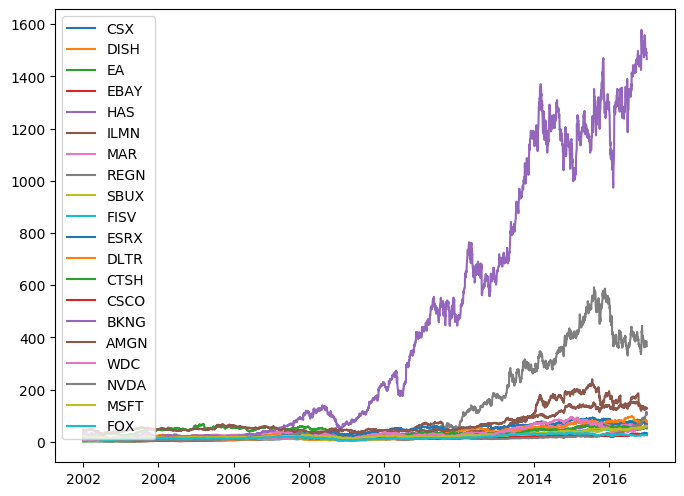

In [14]:
# PLOT ADJ CLOSE
plt.figure(figsize=(8, 6), dpi=100)
for a in Assets:
    plt.plot(d[a]['Adj Close'],label=a)

plt.legend()
plt.show()

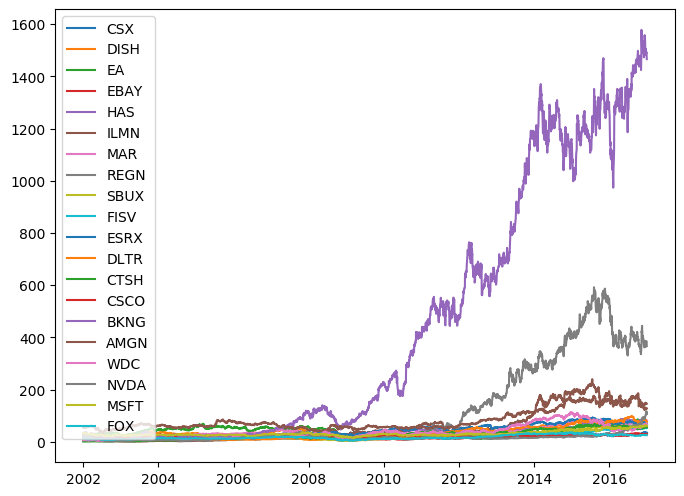

In [15]:
# PLOT CLOSE
plt.figure(figsize=(8, 6), dpi=100)
for a in Assets:
    plt.plot(d[a]['Close'],label=a)

plt.legend()
plt.show()

## Save H5 with Open, Low, High, Close
Result is to be (assets, dates, features)

In [16]:
data = []

for a in Assets:
    data.append(d[a].values.tolist())
    
dates = d[Assets[0]].index.tolist()
dates = [date_obj.strftime('%d/%m/%Y') for date_obj in d[Assets[0]].index.tolist()]

In [17]:
data[0][0]

[5.811666965484619,
 5.900000095367432,
 5.806666851043701,
 5.841667175292969,
 4.2116827964782715,
 4245000,
 nan,
 nan,
 'CSX']

In [18]:
_result = []
for i in range(len(data)): # ASSET
    _asset = []
    for j in range(len(data[0])): # DATES
        _asset.append(data[i][j][:4])
    _result.append(_asset)

In [19]:
result = np.array(_result)

In [20]:
result

array([[[  5.81166697,   5.9000001 ,   5.80666685,   5.84166718],
        [  5.9216671 ,   6.        ,   5.875     ,   5.92333317],
        [  5.88999987,   6.24166679,   5.88999987,   6.24166679],
        ...,
        [ 36.81999969,  37.00999832,  36.5       ,  36.52000046],
        [ 36.61000061,  36.63999939,  36.15999985,  36.22999954],
        [ 36.34999847,  36.40000153,  35.79000092,  35.93000031]],

       [[ 27.37000084,  27.70999908,  27.04999924,  27.46999931],
        [ 27.45000076,  28.79999924,  27.38999939,  28.75      ],
        [ 28.77000046,  29.20000076,  28.29000092,  28.48999977],
        ...,
        [ 59.50999832,  59.68000031,  58.70999908,  58.95000076],
        [ 58.86000061,  59.09000015,  58.11999893,  58.40000153],
        [ 58.40999985,  58.75      ,  57.68999863,  57.93000031]],

       [[ 30.94499969,  30.94499969,  29.89500046,  29.97500038],
        [ 30.24500084,  30.37000084,  29.80500031,  30.05999947],
        [ 30.09499931,  30.80999947,  29.93000

In [21]:
result.shape

(20, 3778, 4)

In [22]:
abb = [abbr.encode() for abbr in Assets]
write_to_h5py(result, abb, dates, "datasets/{}.h5".format(Dataset_Name))

In [23]:
with h5py.File("datasets/{}.h5".format(Dataset_Name), 'r') as f:
    history = f['history'][:]
    abbreviation = f['abbreviation'][:].tolist()
    dates = f['dates'][:].tolist()

In [24]:
import datetime
dates = [datetime.datetime.strptime(date_str, '%d/%m/%Y') for date_str in dates]

In [25]:
dates

[datetime.datetime(2001, 12, 31, 0, 0),
 datetime.datetime(2002, 1, 2, 0, 0),
 datetime.datetime(2002, 1, 3, 0, 0),
 datetime.datetime(2002, 1, 4, 0, 0),
 datetime.datetime(2002, 1, 7, 0, 0),
 datetime.datetime(2002, 1, 8, 0, 0),
 datetime.datetime(2002, 1, 9, 0, 0),
 datetime.datetime(2002, 1, 10, 0, 0),
 datetime.datetime(2002, 1, 11, 0, 0),
 datetime.datetime(2002, 1, 14, 0, 0),
 datetime.datetime(2002, 1, 15, 0, 0),
 datetime.datetime(2002, 1, 16, 0, 0),
 datetime.datetime(2002, 1, 17, 0, 0),
 datetime.datetime(2002, 1, 18, 0, 0),
 datetime.datetime(2002, 1, 22, 0, 0),
 datetime.datetime(2002, 1, 23, 0, 0),
 datetime.datetime(2002, 1, 24, 0, 0),
 datetime.datetime(2002, 1, 25, 0, 0),
 datetime.datetime(2002, 1, 28, 0, 0),
 datetime.datetime(2002, 1, 29, 0, 0),
 datetime.datetime(2002, 1, 30, 0, 0),
 datetime.datetime(2002, 1, 31, 0, 0),
 datetime.datetime(2002, 2, 1, 0, 0),
 datetime.datetime(2002, 2, 4, 0, 0),
 datetime.datetime(2002, 2, 5, 0, 0),
 datetime.datetime(2002, 2, 6, 0,

In [26]:
history

array([[[  5.81166697,   5.9000001 ,   5.80666685,   5.84166718],
        [  5.9216671 ,   6.        ,   5.875     ,   5.92333317],
        [  5.88999987,   6.24166679,   5.88999987,   6.24166679],
        ...,
        [ 36.81999969,  37.00999832,  36.5       ,  36.52000046],
        [ 36.61000061,  36.63999939,  36.15999985,  36.22999954],
        [ 36.34999847,  36.40000153,  35.79000092,  35.93000031]],

       [[ 27.37000084,  27.70999908,  27.04999924,  27.46999931],
        [ 27.45000076,  28.79999924,  27.38999939,  28.75      ],
        [ 28.77000046,  29.20000076,  28.29000092,  28.48999977],
        ...,
        [ 59.50999832,  59.68000031,  58.70999908,  58.95000076],
        [ 58.86000061,  59.09000015,  58.11999893,  58.40000153],
        [ 58.40999985,  58.75      ,  57.68999863,  57.93000031]],

       [[ 30.94499969,  30.94499969,  29.89500046,  29.97500038],
        [ 30.24500084,  30.37000084,  29.80500031,  30.05999947],
        [ 30.09499931,  30.80999947,  29.93000

In [27]:
abbreviation

['CSX',
 'DISH',
 'EA',
 'EBAY',
 'HAS',
 'ILMN',
 'MAR',
 'REGN',
 'SBUX',
 'FISV',
 'ESRX',
 'DLTR',
 'CTSH',
 'CSCO',
 'BKNG',
 'AMGN',
 'WDC',
 'NVDA',
 'MSFT',
 'FOX']

In [28]:
len(abbreviation)

20

In [29]:
history[10]

array([[ 5.88749981,  5.92374992,  5.79400015,  5.84499979],
       [ 5.84749985,  5.86625004,  5.6312499 ,  5.79500008],
       [ 5.79374981,  5.94124985,  5.68874979,  5.75      ],
       ...,
       [69.75      , 69.91999817, 69.29039764, 69.5       ],
       [68.81970215, 69.87000275, 68.81970215, 69.38999939],
       [69.38999939, 69.56999969, 68.51999664, 68.79000092]])